# Proyek Analisis Data: Rental Sepeda
- **Nama:** Arjuna Dwi Damara Putra
- **Email:** arjuna.dwi.damara.putra.tik22@mhsw.pnj.ac.id
- **ID Dicoding:** arjuna_dwi

## Menentukan Pertanyaan 

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Seberapa besar peran suhu terasa (atemp) dalam memengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [71]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

## Data Wrangling

### Gathering Data

In [72]:
day_df = pd.read_csv("D:\POLITEKNIK NEGERI JAKARTA\PITON PROJEK\Belajar analisis data\Projek_Rental_Sepda\data\day.csv")
day_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\nomou\AppData\Local\Temp\ipykernel_14944\1553754561.py:1: SyntaxWarning: invalid escape sequence '\P'
  day_df = pd.read_csv("D:\POLITEKNIK NEGERI JAKARTA\PITON PROJEK\Belajar analisis data\Projek_Rental_Sepda\data\day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [73]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [74]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [75]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
DataFrame "day" tidak ada nilai yang missing

### Cleaning Data

In [76]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [77]:
print('day_df["dteday"] : ', day_df["dteday"].dtypes)

day_df["dteday"] :  datetime64[ns]


**Insight:**
Memperbaiki Tipe Data


## Exploratory Data Analysis (EDA)

### Deskripsi Data

In [78]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Hubungan sewa sepeda dengan kondisi cuaca

C:\Users\nomou\AppData\Local\Temp\ipykernel_14944\3320496445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='weather_label', y='cnt', data=day_df, palette='coolwarm')


Text(0, 0.5, 'Jumlah Penyewaan Sepeda')

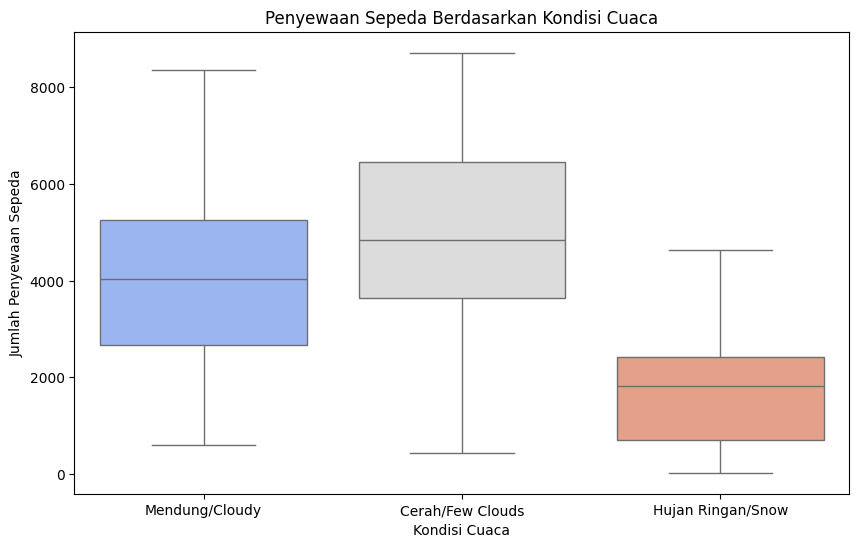

In [79]:
weather_labels = {
    1: 'Cerah/Few Clouds',
    2: 'Mendung/Cloudy',
    3: 'Hujan Ringan/Snow'
}
day_df['weather_label'] = day_df['weathersit'].map(weather_labels)

plt.figure(figsize=(10, 6))
sn.boxplot(x='weather_label', y='cnt', data=day_df, palette='coolwarm')
plt.title('Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')

### Hubungan sewa sepeda dengan musim

C:\Users\nomou\AppData\Local\Temp\ipykernel_14944\3509350460.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='season_label', y='cnt', data=day_df, palette='coolwarm')


Text(0, 0.5, 'Jumlah Penyewaan Sepeda')

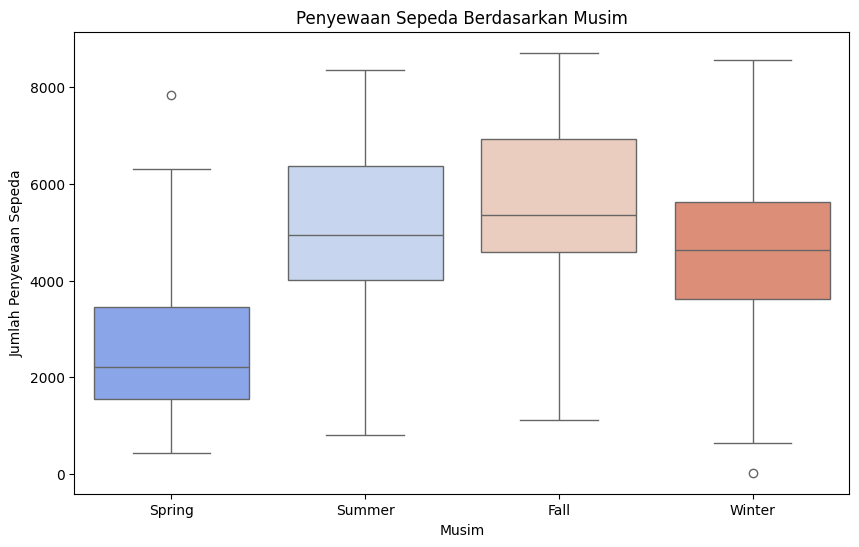

In [80]:
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_labels)

plt.figure(figsize=(10, 6))
sn.boxplot(x='season_label', y='cnt', data=day_df, palette='coolwarm')
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?


In [81]:
weather_rental_mean = day_df.groupby('weathersit')['cnt'].mean()

C:\Users\nomou\AppData\Local\Temp\ipykernel_14944\3358346742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=weather_rental_mean.index, y=weather_rental_mean.values, palette='coolwarm')


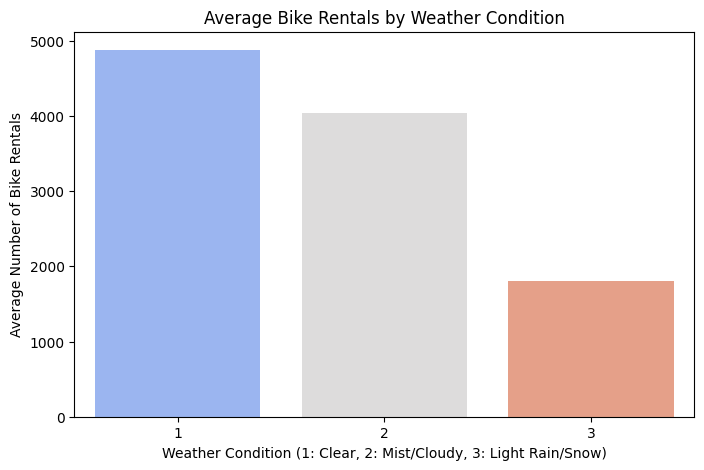

In [82]:
plt.figure(figsize=(8,5))
sn.barplot(x=weather_rental_mean.index, y=weather_rental_mean.values, palette='coolwarm')
plt.title("Average Bike Rentals by Weather Condition")
plt.xlabel("Weather Condition (1: Clear, 2: Mist/Cloudy, 3: Light Rain/Snow)")
plt.ylabel("Average Number of Bike Rentals")
plt.show()

**Insight:**
Semakin cerah cuaca semakin banyak sepeda yang di rental

### Pertanyaan 2: Seberapa besar peran suhu terasa (atemp) dalam memengaruhi jumlah penyewaan sepeda?

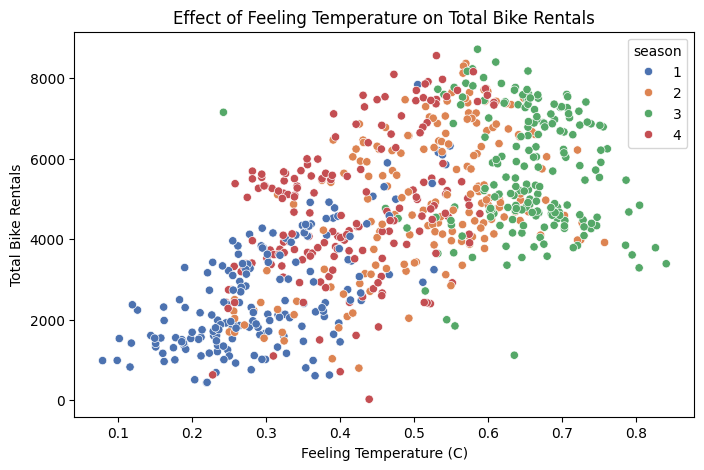

In [83]:
plt.figure(figsize=(8,5))
sn.scatterplot(x=day_df['atemp'], y=day_df['cnt'], hue=day_df['season'], palette='deep')
plt.title("Effect of Feeling Temperature on Total Bike Rentals")
plt.xlabel("Feeling Temperature (C)")
plt.ylabel("Total Bike Rentals")
plt.show()

**Insight:**
- xxx
- xxx

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2